<img src="logo.JPG" alt="IBM Capstone">

 <h1> Content <h1>
<hr/>
<ul>
    <li>Introduction.</li>
    <li>Description, usage and the source  of the data.</li>    
    <li>Methodology section.</li>
    <li>Discussion section.</li>
    <li>Result and Conclusion section.</li>   
</ul>
<hr/> 

<hr/> 
<img src="NYC.jpg" alt="IBM Capstone">
<hr/> 

#  Introduction.

#### &bull; The business problem: <br/>
The City of New York, is the most populous city in the United States. It is diverse and is the financial capital of USA. It is multicultural. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. With it's diverse culture, comes diverse food items. There are many resturants in New york City, each beloning to different categories like Russian, Jewish, Chinese, Indian, French etc.

#### &bull; Who would be interested in this project: <br/>
The market of NYC is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable. This would interest anyone who wants to start a new restaurant busyness in Newyork city

#  Description, usage and the source  of the data.

For this project we need the following data:
<ol>
    <li>New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude</li>
    <li>Caribbean Resturants in each neighborhood of new york city</li>
    <li>GeoSpace data</li>
</ol>


#### &bull; Data description
New York City will be analysed in this project. <br/>
NYC  has 5 boroughs and 306 neighborhoods. 
In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs 
and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.
This dataset exists for free on the web. Link to the dataset is: <a href="https://geo.nyu.edu/catalog/nyu_2451_34572">New York City Neighborhood Names</a><br/>
The next used data is the DOHMH Farmers Markets and Food Boxes dataset. In this we will be using the data of
<a href="https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2">NDOHMH Farmers Markets.</a><br/>
Website: <a href="https://www.grownyc.org/greenmarketco/foodbox">GROW NYC.</a><br/>
<hr/>
    
#### &bull; Data sources    
For the analysis we will get data from wikipedia:
<ul>
<li>NYC Population</li>
<li>NYC Demographics</li>
<li>NYC Cuisine</li>
</ul>    

Links for the data
<p><a href="https://en.wikipedia.org/wiki/New_York_City">New York City</a></p>
<p><a href="https://en.wikipedia.org/wiki/Economy_of_New_York_City">Economy of New York City</a></p>
<p><a href="https://en.wikipedia.org/wiki/Portal:New_York_City">Portal:New York City</a></p>
<p><a href="https://en.wikipedia.org/wiki/Cuisine_of_New_York_City">Cuisine of New York City</a></p>
<p><a href="https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City">List of Michelin starred restaurants in New York City</a></p>
<hr/>

#### &bull; Data usage  
Newyork city geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood.We will use the Foursquare API to explore neighborhoods in New York City. The below is image of the Foursquare API data.

<a href="https://i.imgur.com/MOxxyoY.png ">
  <img src="https://i.imgur.com/MOxxyoY.png" alt="Data Sample">
</a>

#### &bull; The problem that will be investigated in this project     
<ul>
    <li>The best location in New York City for Caribbean Cuisine</li>
    <li>The areas with high potential Caribbean Restaurant Market?</li>
    <li>The areas with lack of Caribbean Restaurants</li>
    <li>The best place to stay if you prefer Caribbean Cuisine?</li>
</ul>   

# Methodology:

1. We begin by collecting the New York city data from "https://cocl.us/new_york_dataset".
2. We will find all venues for each neighborhood using FourSquare API.
3. We will then filter out all Caribbean Restuarant venues.
4. Next using FourSquare API, we will find the Ratings, Tips, and Like count for all the Caribbean Resturants.
5. Next we will sort the data keeping Ratings as the constraint.
6. Finally, we will visualize the Ranking of neighborhoods using python's Folium library.

#### &bull; Import of required Libraries    

In [1]:
import pandas as pd # Library to handle data in a vectorized manner

import numpy as np # Library for data analsysis
# To expand the output display to see more columns of a pandas DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # Library to handle requests

import geocoder # Library to convert physical addresses to Geographic locations → Latitude and Longitude.

import os # Library for operating system dependent functionality

from bs4 import BeautifulSoup # for webscraping import Beautiful Soup 

import folium # map rendering library

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

print('All Libraries were  imported successfully.')

All Libraries were  imported successfully.


#### &bull; Set Foursquare cridetials:

In [2]:
CLIENT_ID = 'XZXT3FYE04WKHEV5I1DFMFTHCKDFBZW4TV0AMAUZIKTLRJFV'
CLIENT_SECRET = 'SNLD4TQSKC3OJP35OCOK3MNTA5A5BRZZE14EVGAH0XPXAZKO'
VERSION = '20200401' 
print('Foursquare Cridetials done')

Foursquare Cridetials done


#### &bull; Define a function to get the geocodes   

In [3]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

#### &bull; Define a function to interact with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return the venue id , venue name and category

In [4]:
def get_venues(lat,lng):
    radius=1000
    LIMIT=100 
    #url to request from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            print('Error in get_venues')    
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### &bull; Define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [5]:
def get_venue_details(venue_id): 
    #url to request from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        print('Error in get_venues')  
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### &bull; Define a function to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json() 
    features=resp['features'] # all the data is present in features label   
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] # define the dataframe columns 
    new_york_data = pd.DataFrame(columns=column_names)  # instantiate the dataframe
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']    
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

#### &bull; Call the above funtion to get the new york city data.

In [7]:
new_york_data=get_new_york_data()

In [8]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
new_york_data.shape

(306, 4)

_The above result shows that there are 306 different Neighborhoods in New York._

#### &bull; Create a bar plot to show different Neighborhoods in New York.

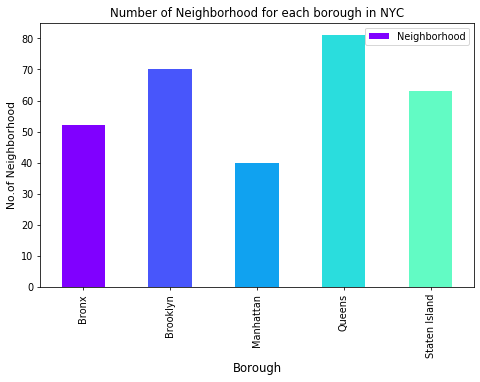

In [10]:
plt.figure(figsize=(8,5), dpi = 70)
plt.title('Number of Neighborhood for each borough in NYC') # title
plt.xlabel('Borough', fontsize = 12) #On x-axis
plt.ylabel('No.of Neighborhood', fontsize=11) #On y-axis
colors = cm.rainbow(np.linspace(0, 1, 10))
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color=colors) #giving a bar plot & color
plt.legend() #legend
plt.show() #displays the plot

_According to the plot, Queens has highest number of neighborhoods_

Next we will collect Caribbean resturants for each Neighborhood.

In [11]:
# prepare neighborhood list that contains Caribbean resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
caribbean_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    caribbean_resturants=venues[venues['Category']=='Caribbean Restaurant']   
    print('(',count,'/',len(new_york_data),')','Caribbean Resturants in '+Neighborhood+', '+Borough+':'+str(len(caribbean_resturants)))
    for resturant_detail in caribbean_resturants.values.tolist():
        id, name , category=resturant_detail
        caribbean_rest_ny = caribbean_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Caribbean Resturants in Wakefield, Bronx:4
( 2 / 306 ) Caribbean Resturants in Co-op City, Bronx:2
( 3 / 306 ) Caribbean Resturants in Eastchester, Bronx:5
( 4 / 306 ) Caribbean Resturants in Fieldston, Bronx:0
( 5 / 306 ) Caribbean Resturants in Riverdale, Bronx:0
( 6 / 306 ) Caribbean Resturants in Kingsbridge, Bronx:1
( 7 / 306 ) Caribbean Resturants in Marble Hill, Manhattan:1
( 8 / 306 ) Caribbean Resturants in Woodlawn, Bronx:1
( 9 / 306 ) Caribbean Resturants in Norwood, Bronx:2
( 10 / 306 ) Caribbean Resturants in Williamsbridge, Bronx:7
( 11 / 306 ) Caribbean Resturants in Baychester, Bronx:1
( 12 / 306 ) Caribbean Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Caribbean Resturants in City Island, Bronx:0
( 14 / 306 ) Caribbean Resturants in Bedford Park, Bronx:1
( 15 / 306 ) Caribbean Resturants in University Heights, Bronx:0
( 16 / 306 ) Caribbean Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Caribbean Resturants in Fordham, Bronx:1
( 18 / 306 ) Caribbea

( 136 / 306 ) Caribbean Resturants in Forest Hills, Queens:1
( 137 / 306 ) Caribbean Resturants in Kew Gardens, Queens:1
( 138 / 306 ) Caribbean Resturants in Richmond Hill, Queens:1
( 139 / 306 ) Caribbean Resturants in Flushing, Queens:0
( 140 / 306 ) Caribbean Resturants in Long Island City, Queens:0
( 141 / 306 ) Caribbean Resturants in Sunnyside, Queens:1
( 142 / 306 ) Caribbean Resturants in East Elmhurst, Queens:0
( 143 / 306 ) Caribbean Resturants in Maspeth, Queens:0
( 144 / 306 ) Caribbean Resturants in Ridgewood, Queens:0
( 145 / 306 ) Caribbean Resturants in Glendale, Queens:0
( 146 / 306 ) Caribbean Resturants in Rego Park, Queens:0
( 147 / 306 ) Caribbean Resturants in Woodhaven, Queens:0
( 148 / 306 ) Caribbean Resturants in Ozone Park, Queens:0
( 149 / 306 ) Caribbean Resturants in South Ozone Park, Queens:2
( 150 / 306 ) Caribbean Resturants in College Point, Queens:1
( 151 / 306 ) Caribbean Resturants in Whitestone, Queens:0
( 152 / 306 ) Caribbean Resturants in Baysi

( 267 / 306 ) Caribbean Resturants in Astoria Heights, Queens:0
( 268 / 306 ) Caribbean Resturants in Claremont Village, Bronx:1
( 269 / 306 ) Caribbean Resturants in Concourse Village, Bronx:2
( 270 / 306 ) Caribbean Resturants in Mount Eden, Bronx:0
( 271 / 306 ) Caribbean Resturants in Mount Hope, Bronx:0
( 272 / 306 ) Caribbean Resturants in Sutton Place, Manhattan:0
( 273 / 306 ) Caribbean Resturants in Hunters Point, Queens:0
( 274 / 306 ) Caribbean Resturants in Turtle Bay, Manhattan:0
( 275 / 306 ) Caribbean Resturants in Tudor City, Manhattan:0
( 276 / 306 ) Caribbean Resturants in Stuyvesant Town, Manhattan:1
( 277 / 306 ) Caribbean Resturants in Flatiron, Manhattan:0
( 278 / 306 ) Caribbean Resturants in Sunnyside Gardens, Queens:0
( 279 / 306 ) Caribbean Resturants in Blissville, Queens:1
( 280 / 306 ) Caribbean Resturants in Fulton Ferry, Brooklyn:0
( 281 / 306 ) Caribbean Resturants in Vinegar Hill, Brooklyn:0
( 282 / 306 ) Caribbean Resturants in Weeksville, Brooklyn:5
(

_Now that we have got all the Caribbean resturants in new york city , we will analyze it._

In [12]:
caribbean_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4d375ce799fe8eec99fd2355,Ripe Kitchen & Bar
1,Bronx,Wakefield,4c9e50e38afca09379b2ff15,Ali's Roti Shop
2,Bronx,Wakefield,4c10f6aece57c92804a682d2,Jackie's West Indian Bakery
3,Bronx,Wakefield,508af256e4b0578944c87392,Cooler Runnings Jamaican Restaurant Inc
4,Bronx,Co-op City,4baab2b0f964a520c7803ae3,Country Thyme Cuisine


In [13]:
caribbean_rest_ny.shape

(242, 4)

_From the above result, we see that there are 242 Caribbean Resturants across New York City._

#### &bull; Create a plot to show Number of Caribbean Resturants for each Borough in New York City.

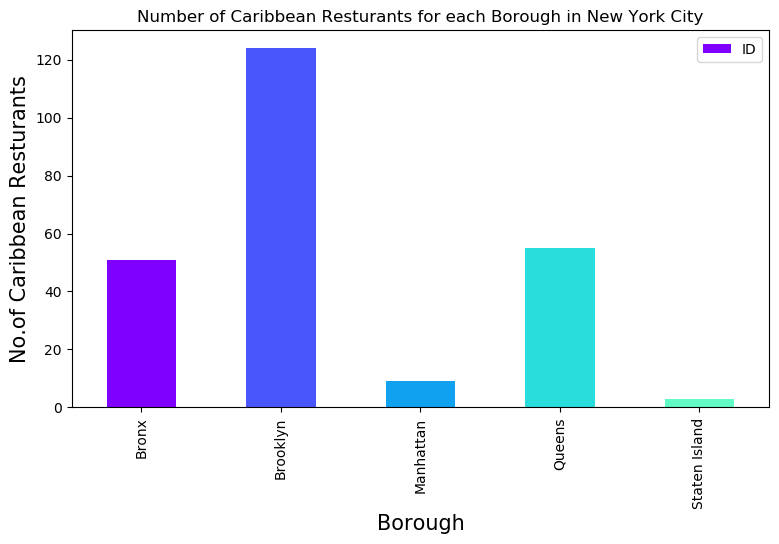

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Caribbean Resturants for each Borough in New York City') # title
plt.xlabel('Borough', fontsize = 15) #On x-axis
plt.ylabel('No.of Caribbean Resturants', fontsize=15) #On y-axis
colors = cm.rainbow(np.linspace(0, 1, 10))
caribbean_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color=colors)
plt.legend() #legend
plt.show() #displays the plot

_From the above Bar Plot, we can see that Brooklyn has highest number of Caribbean resturants._

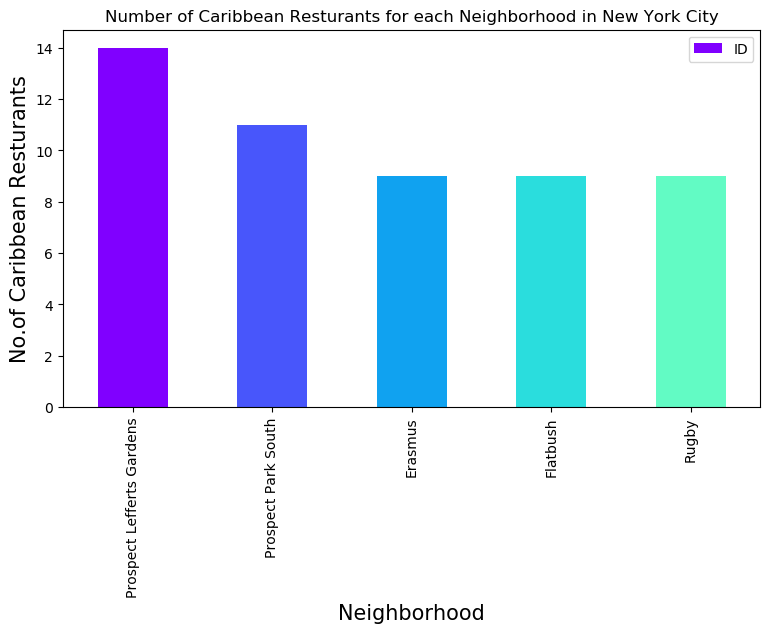

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Caribbean Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Caribbean Resturants', fontsize=15)
#giving a bar plot
colors = cm.rainbow(np.linspace(0, 1, 10)) 
caribbean_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color=colors)
#legend
plt.legend()
#displays the plot
plt.show()

In [16]:
caribbean_rest_ny[caribbean_rest_ny['Neighborhood']=='Prospect Lefferts Gardens']

,Borough,Neighborhood,ID,Name
89,Brooklyn,Prospect Lefferts Gardens,4a6cba95f964a52073d11fe3,Peppa's Jerk Chicken
90,Brooklyn,Prospect Lefferts Gardens,4bdcade72a3a0f470fecb3b6,MangoSeed Restaurant
91,Brooklyn,Prospect Lefferts Gardens,4d0e9e455b8a8cfa5e50eb83,De Hot Pot Roti Shop
92,Brooklyn,Prospect Lefferts Gardens,4c79b5f683a7bfb7527f7ff8,Errol's Caribbean Bakery
93,Brooklyn,Prospect Lefferts Gardens,54fbad6b498e83b622d3c796,The Food Sermon
94,Brooklyn,Prospect Lefferts Gardens,4e0904426284d9ee92de668b,Golden Krust Caribbean Restaurant
95,Brooklyn,Prospect Lefferts Gardens,4b085b46f964a520f50923e3,Gloria's
96,Brooklyn,Prospect Lefferts Gardens,4bd3475c046076b084a97571,Culpepper's
97,Brooklyn,Prospect Lefferts Gardens,4e26eebed16486291ba4d622,Jen's Roti Shop
98,Brooklyn,Prospect Lefferts Gardens,4cd4918576ab721eacf3676a,Soldiers Jamaican


_Co-op City in Queens has the highest number of Caribbean Resturants with a total count of 14._

#### &bull;  Rank of each resturant for further analysis.

In [17]:
# prepare neighborhood list that contains Caribbean resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
caribbean_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in caribbean_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(caribbean_rest_ny),')','processed')
    caribbean_rest_stats_ny = caribbean_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                Name  Likes  Rating  Tips
0  4d375ce799fe8eec99fd2355  Ripe Kitchen & Bar     70     8.8    33
( 1 / 242 ) processed
                         ID             Name  Likes  Rating  Tips
0  4c9e50e38afca09379b2ff15  Ali's Roti Shop     16     8.6     9
( 2 / 242 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c10f6aece57c92804a682d2  Jackie's West Indian Bakery     22     7.5    13
( 3 / 242 ) processed
                         ID                                     Name  Likes  \
0  508af256e4b0578944c87392  Cooler Runnings Jamaican Restaurant Inc      7   

   Rating  Tips  
0     6.7     4  
( 4 / 242 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4baab2b0f964a520c7803ae3  Country Thyme Cuisine     18     7.9     7
( 5 / 242 ) processed
                         ID                               Name  Likes  Rating  \
0  4c757642b474a1cd2858b9bf  Golden Krust Ca

                         ID        Name  Likes  Rating  Tips
0  5879815625911e1bb23364a0  Sip unWINE      9     7.5     4
( 48 / 242 ) processed
                         ID              Name  Likes  Rating  Tips
0  4be5ad3a2457a5932fd0ab15  Fisherman's Cove     75     8.6    18
( 49 / 242 ) processed
                         ID           Name  Likes  Rating  Tips
0  54fa4b21498e671122cb4d11  Island Burger     27     8.2     8
( 50 / 242 ) processed
                         ID           Name  Likes  Rating  Tips
0  4ce6e9808ef78cfaf09b8f9b  Faye & King's     13     7.3     6
( 51 / 242 ) processed
                         ID           Name  Likes  Rating  Tips
0  4ce0265e78ddf04df9b3a498  Bake & Things     50     7.5    14
( 52 / 242 ) processed
                         ID                                   Name  Likes  \
0  4bf6df9d4a67c928b49422cf  Golden Krust Caribbean Bakery & Grill      7   

   Rating  Tips  
0     6.5     2  
( 53 / 242 ) processed
                         ID    

( 96 / 242 ) processed
                         ID         Name  Likes  Rating  Tips
0  4bd3475c046076b084a97571  Culpepper's     20     7.0    13
( 97 / 242 ) processed
                         ID             Name  Likes  Rating  Tips
0  4e26eebed16486291ba4d622  Jen's Roti Shop     16     7.7     7
( 98 / 242 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cd4918576ab721eacf3676a  Soldiers Jamaican     20     7.1     9
( 99 / 242 ) processed
                         ID             Name  Likes  Rating  Tips
0  4e21d5c6e4cdf68591898a5e  Caribbean Vibes     13     7.7     5
( 100 / 242 ) processed
                         ID                                   Name  Likes  \
0  4c5dd01cd25320a1a924c77a  De Bamboo Express Restaurant & Bakery     11   

   Rating  Tips  
0     7.2     4  
( 101 / 242 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4a611b29f964a520dec11fe3  Nio's Trinidad Roti Shop     31     7.5  

                         ID                               Name  Likes  Rating  \
0  4c2cd1bad1a10f47c20dfa64  Golden Krust Caribbean Restaurant      1     7.1   

   Tips  
0     2  
( 146 / 242 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4dcde05f183899ddfac4b4fa  Good Taste Catering     14     7.4     2
( 147 / 242 ) processed
                         ID            Name  Likes  Rating  Tips
0  4c75c2ec604a370462c88349  Whipped Treats     10     8.7    10
( 148 / 242 ) processed
                         ID                               Name  Likes  Rating  \
0  4cc1bac501fb236aeb579aba  Golden Krust Caribbean Restaurant     21     7.5   

   Tips  
0     8  
( 149 / 242 ) processed
Error in get_venues
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4d5730c2b4deb1f771d61a7a
( 150 / 242 ) processed
Error in get_venues
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available f

                         ID                               Name  Likes  Rating  \
0  4bc56cea5935c9b68ef2a5d2  Golden Krust Caribbean Restaurant      4     7.2   

   Tips  
0    11  
( 194 / 242 ) processed
                         ID        Name  Likes  Rating  Tips
0  4b464895f964a520791c26e3  Best Bites     25     7.5    10
( 195 / 242 ) processed
                         ID                          Name  Likes  Rating  Tips
0  4c8ac3c852a98cfa25c12fe9  Trinidad Roti House & Bakery      5     7.8     6
( 196 / 242 ) processed
                         ID                       Name  Likes  Rating  Tips
0  4bc4c577abf49521628bc593  C & J Jamaican Restaurant     47     6.8    41
( 197 / 242 ) processed
                         ID                               Name  Likes  Rating  \
0  4d8e436cca75b60c194afba8  Golden Krust Caribbean Restaurant      3     7.0   

   Tips  
0     1  
( 198 / 242 ) processed
                         ID                Name  Likes  Rating  Tips
0  4cbdab3f43

                         ID                                   Name  Likes  \
0  4bf6df9d4a67c928b49422cf  Golden Krust Caribbean Bakery & Grill      7   

   Rating  Tips  
0     6.5     2  
( 240 / 242 ) processed
                         ID     Name  Likes  Rating  Tips
0  4d31ea9cb6093704551ef1df  Goody's     29     8.8    14
( 241 / 242 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4f5660c3e4b0ac8e5470d4b2  Melting Pot Cuisine     15     7.9     9
( 242 / 242 ) processed


In [18]:
caribbean_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Wakefield,4d375ce799fe8eec99fd2355,Ripe Kitchen & Bar,70,8.8,33
1,Bronx,Wakefield,4c9e50e38afca09379b2ff15,Ali's Roti Shop,16,8.6,9
2,Bronx,Wakefield,4c10f6aece57c92804a682d2,Jackie's West Indian Bakery,22,7.5,13
3,Bronx,Wakefield,508af256e4b0578944c87392,Cooler Runnings Jamaican Restaurant Inc,7,6.7,4
4,Bronx,Co-op City,4baab2b0f964a520c7803ae3,Country Thyme Cuisine,18,7.9,7


In [19]:
caribbean_rest_stats_ny.shape

(242, 7)

In [20]:
caribbean_rest_ny.shape

(242, 4)

#### &bull;  Get the data for all resturantsand save this data to a csv sheet.  As the number of calls to get details for venue are premium call and have limit of 500 per day, refer to saved data sheet csv if required.

In [21]:
caribbean_rest_stats_ny.to_csv('caribbean_rest_stats_ny.csv', index=False)

#### &bull;  Verify the data from saved csv file.

In [22]:
caribbean_rest_stats_ny_csv=pd.read_csv('caribbean_rest_stats_ny.csv')

In [23]:
caribbean_rest_stats_ny_csv.shape

(242, 7)

In [24]:
caribbean_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Wakefield,4d375ce799fe8eec99fd2355,Ripe Kitchen & Bar,70,8.8,33
1,Bronx,Wakefield,4c9e50e38afca09379b2ff15,Ali's Roti Shop,16,8.6,9
2,Bronx,Wakefield,4c10f6aece57c92804a682d2,Jackie's West Indian Bakery,22,7.5,13
3,Bronx,Wakefield,508af256e4b0578944c87392,Cooler Runnings Jamaican Restaurant Inc,7,6.7,4
4,Bronx,Co-op City,4baab2b0f964a520c7803ae3,Country Thyme Cuisine,18,7.9,7


In [25]:
caribbean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       242 non-null    object 
 1   Neighborhood  242 non-null    object 
 2   ID            242 non-null    object 
 3   Name          242 non-null    object 
 4   Likes         242 non-null    object 
 5   Rating        242 non-null    float64
 6   Tips          242 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.4+ KB


#### &bull;  Convert the data of types  'Likes' and  'Tips' into type 'Float' for further analysis.

In [26]:
caribbean_rest_stats_ny['Likes']=caribbean_rest_stats_ny['Likes'].astype('float64')
caribbean_rest_stats_ny['Tips']=caribbean_rest_stats_ny['Tips'].astype('float64')

In [27]:
caribbean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       242 non-null    object 
 1   Neighborhood  242 non-null    object 
 2   ID            242 non-null    object 
 3   Name          242 non-null    object 
 4   Likes         242 non-null    float64
 5   Rating        242 non-null    float64
 6   Tips          242 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.4+ KB


#### &bull;  Find the Caribbean restuarants with Maximum Likes, Maximum Ratings and Maximum Tips.

In [28]:
# Find Resturant with maximum Likes
caribbean_rest_stats_ny.iloc[caribbean_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood             Stuyvesant Town
ID              537822d3498edcf629cebd3d
Name                      Miss Lily's 7A
Likes                                570
Rating                               9.2
Tips                                 170
Name: 220, dtype: object

In [29]:
# Find Resturant with maximum Rating
caribbean_rest_stats_ny.iloc[caribbean_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood            Prospect Heights
ID              5a4d750e3fcee83d3f3ce36c
Name                         The Islands
Likes                                 56
Rating                               9.2
Tips                                  15
Name: 64, dtype: object

In [30]:
# Find Resturant with maximum Tips
caribbean_rest_stats_ny.iloc[caribbean_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood             Stuyvesant Town
ID              537822d3498edcf629cebd3d
Name                      Miss Lily's 7A
Likes                                570
Rating                               9.2
Tips                                 170
Name: 220, dtype: object

#### &bull;  Visualize neighborhood withthe  maximum average rating of resturants.

In [31]:
ny_neighborhood_stats=caribbean_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [32]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
61,Prospect Heights,9.2
79,Stuyvesant Town,9.2
10,Bushwick,8.9
37,Hammels,8.8
1,Arverne,8.8
72,Somerville,8.8
34,Fort Greene,8.6
15,Clinton Hill,8.6
68,Rochdale,8.6
89,Woodlawn,8.6


_Above are the top neighborhoods with top average rating of Caribbean resturants._

#### &bull;  Find the average rating of Caribbean Resturants for each Borough.

In [33]:
ny_borough_stats=caribbean_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [34]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.155556
1,Brooklyn,7.270968
0,Bronx,6.847059
3,Queens,6.409091
4,Staten Island,6.000000


#### &bull;  Visualize above data.

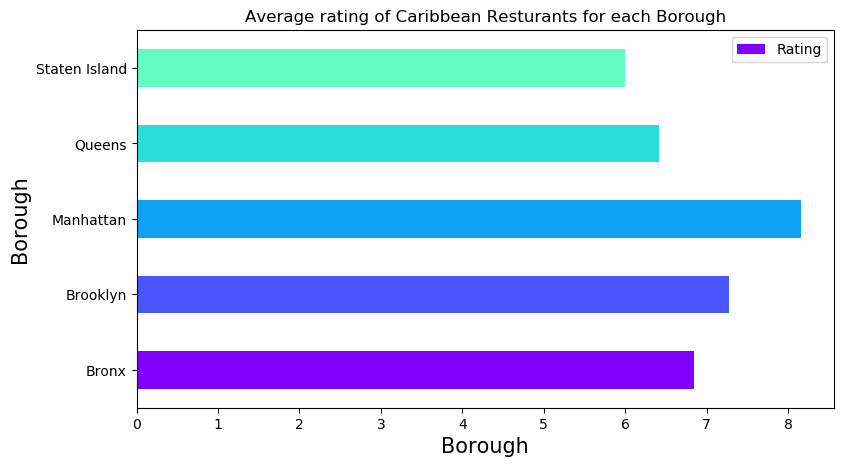

In [35]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Caribbean Resturants for each Borough') # title
plt.xlabel('Borough', fontsize = 15) #On x-axis
plt.ylabel('Average Rating', fontsize=15) #On y-axis
colors = cm.rainbow(np.linspace(0, 1, 10))
caribbean_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='barh', color=colors) #giving a barh plot
plt.legend() #legend
plt.show() #displays the plot

_All the neighborhoods with average rating greater or equal 9.0 to visualize on map._

In [36]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

In [37]:
ny_neighborhood_stats

,Neighborhood,Average Rating
61,Prospect Heights,9.2
79,Stuyvesant Town,9.2


#### &bull;  Get lonitude and latitude.

In [38]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [39]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [40]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Prospect Heights,40.676822,-73.964859,9.2
1,Manhattan,Stuyvesant Town,40.731000,-73.974052,9.2


#### &bull;  Visualize the Data

In [41]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [42]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

#### &bull;  Add Labeles

In [43]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [44]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
ny_map.add_child(incidents) # add incidents to map

#### &bull;   Visualize Boroughs according to average Rating.

In [45]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'BoroughBoundaries.geojson'

map = ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map 
# Save it to a file
ny_map.save('borough_rating.html')
print('Saved to borough_rating.html')

Saved to borough_rating.html


# Discussion section

I am very impressed with the overall organization, content and  labs presented in the Coursera IBM Certification Course
This Capstone project gives me a great opportunity to gain the knowledge and to practice and apply the Data Science tools and studied methodologies.

# Result and Conclusion section

#### &bull; The nalysis the problems investigated in this project:     
<ul>
    <li>Prospect Heights(Brooklyn), Stuyvesant Town(Manhattan), are  the best neighborhoods for Caribbean cuisine.</li>
    <li>Manhattan have potential Caribbean Resturant Market.</li>
    <li> Staten Island ranks last in average rating of Caribbean Resturants.</li>
    <li>Manhattan is the best place to stay if you prefer Caribbean Cuisine.</li>
</ul>  